### Use the best performing model to predict the labels of the test data

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [10]:
# Load the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle("data/test_batch")
label_names = unpickle("data/batches.meta")

# Reshape every image from (3073,) to (32,32,3)so we can see it with plt.imshow()
def reshape_transpose(batch):
    images = batch[b"data"].reshape(10000, 3, 32, 32) # Because of how np.reshape works, this returns an array with np.shape=(10000,3,32,32)
    images = images.transpose(0,2,3,1) # We transpose it so it has the correct np.shape=(10000,32,32,3) for plt.imshow()
    return images
test_images = reshape_transpose(test_batch)

In [6]:
X_test = test_images
y_test = test_batch[b'labels']

# Convert labels to categorical. This way, every int [0:10] is a class and it won't be treated as continous
y_test = to_categorical(y_test, num_classes=10)

# Scale images to the [0, 1] range
X_test = X_test.astype("float32") / 255.0

In [7]:
# Load the best model
best_model = pickle.load(open("trained_model_whole_dataset.pkl", "rb"))

In [8]:
# Use the best model to predict the labels
y_pred = np.argmax(best_model.predict(X_test), axis=1) # Turn the predictions from a float to an int so they match the labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


In [9]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test precision:", score[2])
print("Test recall:", score[3])

Test loss: 0.7766907811164856
Test accuracy: 0.8285999894142151
Test precision: 0.8396689295768738
Test recall: 0.8216999769210815


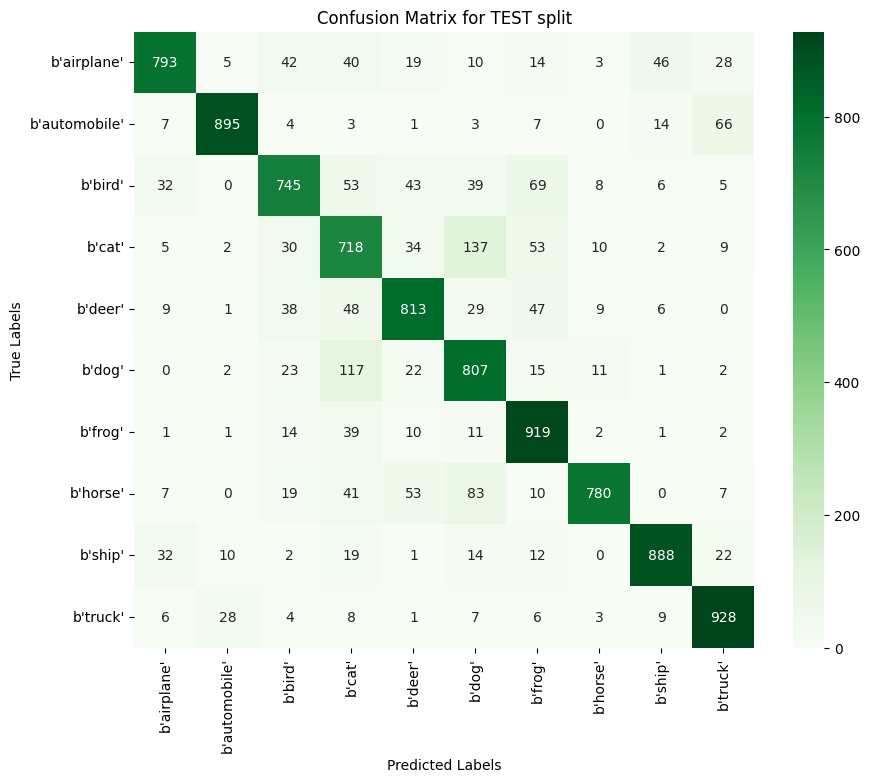

In [12]:
conf_matrix_test = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Confusion matrix for test data
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_test,
            annot=True,
            fmt="d",
            cmap="Greens",
            xticklabels=label_names[b'label_names'],
            yticklabels=label_names[b'label_names'],
            )
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for TEST split")
plt.show()